In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fs_df = pd.read_csv('../data/fullsample.csv')
ce5_df = pd.read_csv('../data/ce5_9024_sbatch.csv')
ce6_df = pd.read_csv('../data/ce6_9024_sbatch.csv')

In [4]:
fs_df['BEGIN'] = pd.to_datetime(fs_df['BEGIN'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
fs_df['END'] = pd.to_datetime(fs_df['END'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
ce5_df['0'] = pd.to_datetime(ce5_df['0'], format='%Y-%m-%dT%H:%M:%S')
ce6_df['0'] = pd.to_datetime(ce6_df['0'], format='%Y-%m-%dT%H:%M:%S')

In [5]:
fs_923_df = fs_df[(fs_df['BEGIN'].dt.month == 9) & (fs_df['BEGIN'].dt.day == 23)]
ce5_923_df = ce5_df[(ce5_df['0'].dt.month == 9) & (ce5_df['0'].dt.day == 23)]
ce6_923_df = ce6_df[(ce6_df['0'].dt.month == 9) & (ce6_df['0'].dt.day == 23)]
ce5_923_df['4'] = ce5_923_df['4'].str.extract(r'(\d)')
ce5_923_df['4'] = pd.to_numeric(ce5_923_df['4'], errors='coerce')
ce6_923_df['4'] = ce6_923_df['4'].str.extract(r'(\d)')
ce6_923_df['4'] = pd.to_numeric(ce6_923_df['4'], errors='coerce')

C:\Users\georg\anaconda3\lib\site-packages\pandas\core\frame.py:3599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item_frame_value(key, value)
C:\Users\georg\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
begin_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['BEGIN', 'USEDMEM', 'CPUS']].rename(columns={'BEGIN':'TIME'})
begin_load_df['USEDMEM'] = pd.to_numeric(begin_load_df['USEDMEM'].str[:-1], errors='coerce')
begin_load_df['CPUS'] = pd.to_numeric(begin_load_df['CPUS'], errors='coerce')

end_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['END', 'USEDMEM', 'CPUS']].rename(columns={'END':'TIME'})
# Since ending the process gives back the memory make all this values negative
end_load_df['USEDMEM'] = 0 - pd.to_numeric(end_load_df['USEDMEM'].str[:-1], errors='coerce')
end_load_df['CPUS'] = 0 - pd.to_numeric(end_load_df['CPUS'], errors='coerce')
load_df = begin_load_df.append(end_load_df).fillna(0)
# load_df = load_df[load_df['TIME'].str.match(r'2021-09-23')].sort_values('TIME')
# load_df['TIME'] = pd.to_datetime(load_df['TIME'], format='%Y-%m-%dT%H:%M:%S')
load_df = load_df[(load_df['TIME'].dt.month == 9) & (load_df['TIME'].dt.day == 23)].sort_values('TIME')

In [8]:
fs_ts = pd.Series(list(load_df['USEDMEM']), index=list(load_df['TIME']))

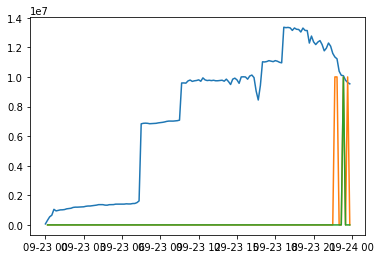

In [9]:
# not sure if the times are aligned here, if they are it might not be
# as clear a case of load issue as first appeared
# Will make another notebook to create a single dataframe so time alignment
#  can be verified
plt.plot(fs_ts.resample("10T").sum().to_frame().cumsum())
plt.plot(ce5_923_df.set_index('0').resample('10T').sum()*10000000)
plt.plot(ce6_923_df.set_index('0').resample('10T').sum()*10000000)